In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from lightgbm.callback import log_evaluation
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import tree
%matplotlib inline

In [ ]:
df_train=pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
df_test=pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

# Train Data Analysis

In [ ]:
df_train.head()

In [ ]:
df_train.shape

In [ ]:
df_train.info()

In [ ]:
df_train.isnull().sum()

In [ ]:
df_train.describe()

In [ ]:
df_train["HomePlanet"].value_counts()

In [ ]:
plt.figure(figsize=(7,5))
color=["red","green","blue"]
planet_count = df_train['HomePlanet'].value_counts()
sns.barplot(x=planet_count.index, y=planet_count.values,palette=color)
plt.title("Count Planets",fontsize=15)
plt.show()

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(data=df_train, y="HomePlanet", hue="CryoSleep",palette="Set2")
plt.title("Count HomePlanet",fontsize=15,color="red")
plt.show()

In [ ]:
df_train["Destination"].value_counts()

In [ ]:
plt.figure(figsize=(7,5))
color1=["olive","brown","orange"]
desti_count = df_train['Destination'].value_counts()
sns.barplot(x=desti_count.index, y=desti_count.values,palette=color1)
plt.title("Destination Counts",fontsize=15)
plt.show()

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(data=df_train, x="Destination", hue="VIP",palette="Set1")
plt.title("Count Destination",fontsize=15,color="red")
plt.show()

In [ ]:
plt.figure(figsize=(7,5))
color0=["crimson","navy"]
sns.countplot(data=df_train, x="Transported",palette=color0)
plt.title("Count Transport",fontsize=15,color="black")
plt.show()

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(data=df_train, x="HomePlanet", y="Age",palette="autumn")
plt.title("HomePlanet vs Age",fontsize=15,color="black")
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
sns.scatterplot(data=df_train, x='Age', y='RoomService', ax=axes[0, 0],color="red")
axes[0, 0].set_title('Age vs RoomService')

sns.scatterplot(data=df_train, x='Age', y='FoodCourt', ax=axes[0, 1],color="green")
axes[0, 1].set_title('Age vs FoodCourt')

sns.scatterplot(data=df_train, x='Age', y='ShoppingMall', ax=axes[1, 0],color="navy")
axes[1, 0].set_title('Age vs ShoppingMall')

sns.scatterplot(data=df_train, x='Age', y='Spa', ax=axes[1, 1],color="darkorange")
axes[1, 1].set_title('Age vs Spa')


sns.scatterplot(data=df_train, x='Age', y='VRDeck', ax=axes[2, 0],color="crimson")
axes[2, 0].set_title('Age vs VRDeck')
fig.delaxes(axes[2, 1])

plt.tight_layout()

plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

ax[0, 0].set_title("Age")
sns.histplot(data=df_train, x="Age", kde=True,bins=40,color="darkorange",ax=ax[0, 0])

ax[0, 1].set_title("RoomService")
sns.histplot(data=df_train, x="RoomService", kde=True,bins=40,color="navy", ax=ax[0, 1])

ax[1, 0].set_title("FoodCourt")
sns.histplot(data=df_train, x="FoodCourt",kde=True,color="purple",bins=40, ax=ax[1, 0])

ax[1, 1].set_title("ShoppingMall")
sns.histplot(data=df_train, x="ShoppingMall",color="red",kde=True,bins=40, ax=ax[1, 1])

ax[2, 0].set_title("Spa")
sns.histplot(data=df_train, x="Spa", kde=True,bins=40,color="crimson", ax=ax[2, 0])

ax[2, 1].set_title("VRDeck")
sns.histplot(data=df_train, x="VRDeck", kde=True,bins=40,color="green", ax=ax[2, 1])

plt.tight_layout()
plt.show()


# Data Preprocessing

### Fill Null Values Using Mode

In [ ]:
mode_value0 = df_train["HomePlanet"].mode()[0]
df_train["HomePlanet"].fillna(mode_value0, inplace=True)
mode_value1 = df_train["CryoSleep"].mode()[0]
df_train["CryoSleep"].fillna(mode_value1, inplace=True)
mode_value2 = df_train["Cabin"].mode()[0]
df_train["Cabin"].fillna(mode_value2, inplace=True)
mode_value3 = df_train["Destination"].mode()[0]
df_train["Destination"].fillna(mode_value3, inplace=True)
mode_value4 = df_train["VIP"].mode()[0]
df_train["VIP"].fillna(mode_value4, inplace=True)

# Fill Null Values Using Mean

In [ ]:
mean_age = df_train['Age'].mean()
df_train['Age'].fillna(mean_age, inplace=True)
roomservice_mean=df_train["RoomService"].mean()
df_train['RoomService'].fillna(roomservice_mean, inplace=True)
foodcourt_mean=df_train["FoodCourt"].mean()
df_train['FoodCourt'].fillna(foodcourt_mean, inplace=True)
shop_mean=df_train["ShoppingMall"].mean()
df_train['ShoppingMall'].fillna(shop_mean, inplace=True)
spa_mean=df_train["Spa"].mean()
df_train['Spa'].fillna(spa_mean, inplace=True)
vr_mean=df_train["VRDeck"].mean()
df_train['VRDeck'].fillna(vr_mean, inplace=True)

# Using LabelEncoder For Transform Data 

In [ ]:
label_encoder = LabelEncoder()
transform_col=["CryoSleep","VIP","Transported"]
for col in transform_col:
    label_encoder.fit([False, True])  
    df_train[col] = label_encoder.transform(df_train[col])

# Transform HomePlanet

In [ ]:
home_col=['Europa', 'Earth', 'Mars']
label_encoder.fit(home_col)
df_train["HomePlanet"]=label_encoder.transform(df_train["HomePlanet"])


# Transform Destination

In [ ]:
home_col=['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e']
label_encoder.fit(home_col)
df_train["Destination"]=label_encoder.transform(df_train["Destination"])

# Transform Cabin 

In [ ]:
df_train['Cabin'] = label_encoder.fit_transform(df_train['Cabin'])

# Drop Id,Name

In [ ]:
df_train.drop(["PassengerId","Name"], axis=1,inplace=True)

# Scale Data Using StandardScaler

In [ ]:
scaler = StandardScaler()
scale_col=["Cabin","Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
df_train[scale_col]=scaler.fit_transform(df_train[scale_col])

In [ ]:
df_train.head()

# masked Lower triangle

In [ ]:
plt.figure(figsize=(10,8))
corr=df_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, annot=True, cmap="cool", fmt=".2f", linewidths=5, linecolor='purple')

plt.show()

# Upper Triangle

In [ ]:
plt.figure(figsize=(10,8))
mask = np.tril(np.ones_like(corr, dtype=bool))
masked_corr = corr.mask(mask)
sns.heatmap(masked_corr, annot=True, cmap="hsv", fmt=".2f", linewidths=5, linecolor='gold')

plt.show()

In [ ]:
plt.figure(figsize=(10,8))

sns.heatmap(corr,annot=True,cmap="hot",fmt=".2f", linewidths=5, linecolor='navy')
plt.show()

In [ ]:
df_train.head()

In [ ]:
train_col=["HomePlanet","CryoSleep","Cabin","Destination","Age","VIP","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

In [ ]:
train_data=df_train[train_col]
label_data=df_train["Transported"]

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(train_data,label_data,test_size=0.2,random_state=42)

# CatBoost Classifier

In [ ]:
params = {'learning_rate': 0.1, 'depth': 6,'l2_leaf_reg': 3, 'iterations': 200}
cat_model = CatBoostClassifier(**params)
cat_model.fit(X_train, Y_train,eval_set=(X_test, Y_test),early_stopping_rounds=30,  
          verbose=100)


In [ ]:
y_pred = cat_model.predict(X_test)
cat_accuracy = (y_pred == np.array(Y_test)).mean()
print("Validation Accuracy:", cat_accuracy)

![](https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg)

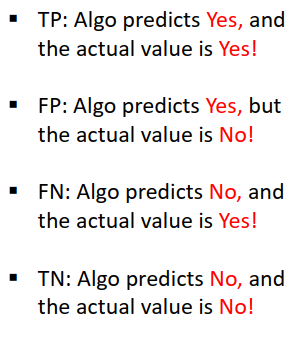

In [ ]:
plt.figure(figsize=(7,5))
label_name=["False","True"]
cf_matrix=confusion_matrix(Y_test,y_pred)
sns.heatmap(cf_matrix,annot=True,fmt="d",cmap="winter",xticklabels=label_name,yticklabels=label_name)
plt.title("Confusion Matrix",fontsize=14,color="purple")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print(classification_report(Y_test,y_pred,target_names=label_name))

# XGBClassifier

In [ ]:
xgbc = XGBClassifier()
xgbc.fit(X_train,Y_train)

In [ ]:
xgb_pred=xgbc.predict(X_test)
xgb_accuracy=accuracy_score(Y_test,xgb_pred)
print("Accuracy Score is :",xgb_accuracy)

In [ ]:
plt.figure(figsize=(7,5))
label_name=["False","True"]
cf_matrix=confusion_matrix(Y_test,xgb_pred)
sns.heatmap(cf_matrix,annot=True,fmt="d",cmap="summer",xticklabels=label_name,yticklabels=label_name)
plt.title("Confusion Matrix",fontsize=14,color="purple")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print(classification_report(Y_test,xgb_pred,target_names=label_name))

# GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.01,max_depth=5, random_state=24)
gb.fit(X_train,Y_train)

In [ ]:
gb_pred=gb.predict(X_test)
gb_accuracy=accuracy_score(Y_test,xgb_pred)
print("Accuracy Score is :",gb_accuracy)

In [ ]:
plt.figure(figsize=(7,5))
label_name=["False","True"]
cf_matrix=confusion_matrix(Y_test,gb_pred)
sns.heatmap(cf_matrix,annot=True,fmt="d",cmap="seismic",xticklabels=label_name,yticklabels=label_name)
plt.title("Confusion Matrix",fontsize=14,color="purple")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print(classification_report(Y_test,gb_pred,target_names=label_name))

# LGBMClassifier

In [ ]:
lgb_model=LGBMClassifier(n_estimators=100)


In [ ]:
lgb_model.fit(X_train, Y_train,eval_set=[(X_test, Y_test),(X_train, Y_train)],eval_metric='logloss')

In [ ]:
lgb_pred=lgb_model.predict(X_test)
lgb_accuracy=accuracy_score(Y_test,lgb_pred)
print("Accuracy Score is :",lgb_accuracy)

In [ ]:
plt.figure(figsize=(7,5))
label_name=["False","True"]
cf_matrix=confusion_matrix(Y_test,lgb_pred)
sns.heatmap(cf_matrix,annot=True,fmt="d",cmap="Dark2",xticklabels=label_name,yticklabels=label_name)
plt.title("Confusion Matrix",fontsize=14,color="purple")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print(classification_report(Y_test,lgb_pred,target_names=label_name))

# DecisionTree Classifier

In [ ]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)

In [ ]:
dt_pred=dt_model.predict(X_test)
dt_accuracy=accuracy_score(Y_test,dt_pred)
print("Accuracy Score is :",dt_accuracy)

In [ ]:

text_representation = tree.export_text(dt_model)
print(text_representation)


In [ ]:
plt.figure(figsize=(7,5))
label_name=["False","True"]
cf_matrix=confusion_matrix(Y_test,dt_pred)
sns.heatmap(cf_matrix,annot=True,fmt="d",cmap="tab10",xticklabels=label_name,yticklabels=label_name)
plt.title("Confusion Matrix",fontsize=14,color="purple")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print(classification_report(Y_test,dt_pred,target_names=label_name))

# ALL Model Result

In [ ]:
model_name = ["CatBoost_Model", "XGB_Model", "GBoosting_Model", "LGB_Model", "DecisionTree_Model"]
model_accuracy = [cat_accuracy, xgb_accuracy, gb_accuracy, lgb_accuracy, dt_accuracy]
plt.figure(figsize=(10, 6))  
sns.barplot(y=model_name, x=model_accuracy,palette="hsv")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy Scores by Model")
plt.xticks(rotation=45)
plt.show()


# Test Data Analysis

In [ ]:
df_test.head()

In [ ]:
df_test.shape

In [ ]:
df_test.info()

In [ ]:
df_test.isnull().sum()

In [ ]:
df_test.describe()

In [ ]:
df_test.drop("Name",axis=1,inplace=True)

# Fill Null Values

In [ ]:
mode_value0 = df_test["HomePlanet"].mode()[0]
df_test["HomePlanet"].fillna(mode_value0, inplace=True)

mode_value1 = df_test["CryoSleep"].mode()[0]
df_test["CryoSleep"].fillna(mode_value1, inplace=True)

mode_value6 = df_test["Cabin"].mode()[0]
df_test["Cabin"].fillna(mode_value6, inplace=True)

mode_value3 = df_test["Destination"].mode()[0]
df_test["Destination"].fillna(mode_value3, inplace=True)

mode_value4 = df_test["VIP"].mode()[0]
df_test["VIP"].fillna(mode_value4, inplace=True)

In [ ]:
mean_age = df_test['Age'].mean()
df_test['Age'].fillna(mean_age, inplace=True)
roomservice_mean=df_test["RoomService"].mean()
df_test['RoomService'].fillna(roomservice_mean, inplace=True)
foodcourt_mean=df_test["FoodCourt"].mean()
df_test['FoodCourt'].fillna(foodcourt_mean, inplace=True)
shop_mean=df_test["ShoppingMall"].mean()
df_test['ShoppingMall'].fillna(shop_mean, inplace=True)
spa_mean=df_test["Spa"].mean()
df_test['Spa'].fillna(spa_mean, inplace=True)
vr_mean=df_test["VRDeck"].mean()
df_test['VRDeck'].fillna(vr_mean, inplace=True)

In [ ]:
df_test.isnull().sum()

In [ ]:
label_encoder = LabelEncoder()
transform_col=["CryoSleep","VIP"]
for col in transform_col:
    label_encoder.fit([False, True])  
    df_test[col] = label_encoder.transform(df_test[col])

In [ ]:
df_test.head()

# Transform HomePlanet,Destination,Cabin

In [ ]:
home_col=['Europa', 'Earth', 'Mars']
label_encoder.fit(home_col)
df_test["HomePlanet"]=label_encoder.transform(df_test["HomePlanet"])

In [ ]:
home_col=['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e']
label_encoder.fit(home_col)
df_test["Destination"]=label_encoder.transform(df_test["Destination"])


In [ ]:
df_test["Cabin"]=label_encoder.fit_transform(df_test["Cabin"])

In [ ]:
df_test.head()

In [ ]:
PassengerId=df_test.PassengerId

In [ ]:
df_test.drop("PassengerId",axis=1,inplace=True)

In [ ]:
my_prediction=cat_model.predict(df_test)
my_pred=my_prediction.astype(bool)
my_submission=pd.DataFrame({'PassengerId':PassengerId,'Transported':my_pred})
my_submission.to_csv('submission.csv',index=False)

In [ ]:
my_submission.head(20)